# Pearson's correlation coefficient

<div class="custom-button-row">
    <a 
        class="custom-button custom-download-button" href="../../../notebooks/08_colocalization/pixel_intensity_based_colocalization_pearsons.ipynb" download>
        <i class="fas fa-download"></i> Download this Notebook
    </a>
    <a
    class="custom-button custom-download-button" href="https://colab.research.google.com/github/HMS-IAC/bobiac/blob/gh-pages/colab_notebooks/08_colocalization/pixel_intensity_based_colocalization_pearsons.ipynb" target="_blank">
        <img class="button-icon" src="../../../_static/logo/icon-google-colab.svg" alt="Open in Colab">
        Open in Colab
    </a>
</div>

In [1]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "matplotlib",
#     "ndv[jupyter,vispy]",
#     "scikit-image",
#     "scipy",
#     "tifffile",
#     "imagecodecs",
# ]
# ///

## Description

In this section, we will explore how to implement in Python the **Pearson's Correlation Coefficient**, which is a common method for quantifying colocalization based on pixel intensities.

```{warning}
NOTE: this notebook aims to show how to practically implement these methods but does not aim to describe when to use which method. The images used have been selected to showcase the practical implementation of the methods.
```

### import libraries

In [1]:
import matplotlib.pyplot as plt
import ndv
import numpy as np
import tifffile
from scipy.stats import pearsonr

## Pearson's Correlation Coefficients

Pearson's correlation coefficients are a measure of colocalization that is based on the pixel intensities of two channels.

...

### open an image and visualize it with ndv

In [2]:
# open the image
img_path = "../../_static/images/coloc/14na_z4.tif"
img = tifffile.imread(img_path)

In [ ]:
# visualize the image
ndv.imshow(img)

In [ ]:
viewer = ndv.imshow(img)

In [ ]:
viewer.widget().children[1].snapshot()

To compute Pearson's Correlation Coefficients, we need **two separate images** (channels).

What is the image shape? How do we split the channels?

In [3]:
# get image shape
print("Image shape:", img.shape)

Image shape: (2, 512, 512)


In [4]:
# split the image into channels
ch1 = img[0]
ch2 = img[1]

## Pearson's Correlation Coefficient
<!-- <div align="center"> <img src="https://raw.githubusercontent.com/HMS-IAC/bobiac/main/_static/images/coloc/pearsons.png" alt="Ilastik Logo" width="600"></div> -->
<div align="left"> <img src="../../_static/images/coloc/pearsons.png" alt="Ilastik Logo" width="600"></div>

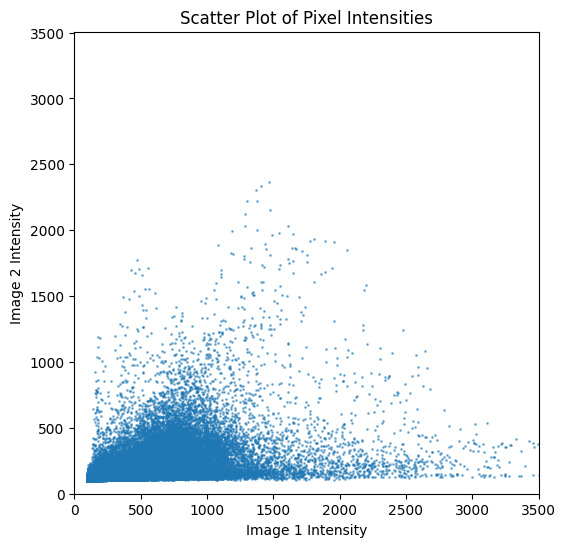

In [5]:
# plot scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(ch1.flatten(), ch2.flatten(), s=1, alpha=0.5)
plt.xlabel("Image 1 Intensity")
plt.ylabel("Image 2 Intensity")
plt.title("Scatter Plot of Pixel Intensities")
# set both axes to the same range based on the maximum value
max_intensity = max(ch1.max(), ch2.max())
plt.xlim(0, max_intensity)
plt.ylim(0, max_intensity)
plt.show()

In [6]:
mean_ch1 = np.mean(ch1)
mean_ch2 = np.mean(ch2)

numerator = np.sum((ch1 - mean_ch1) * (ch2 - mean_ch2))
denominator = np.sqrt(np.sum((ch1 - mean_ch1) ** 2) * np.sum((ch2 - mean_ch2) ** 2))
prs = numerator / denominator
print(f"Pearson's correlation coefficient: {prs:.4f}")

pearson, p_value = pearsonr(ch1.flatten(), ch2.flatten())
print(
    f"Pearson's correlation coefficient (scipy): {pearson:.4f}, p-value: {p_value:.4f}"
)

Pearson's correlation coefficient: 0.5383
Pearson's correlation coefficient (scipy): 0.5383, p-value: 0.0000


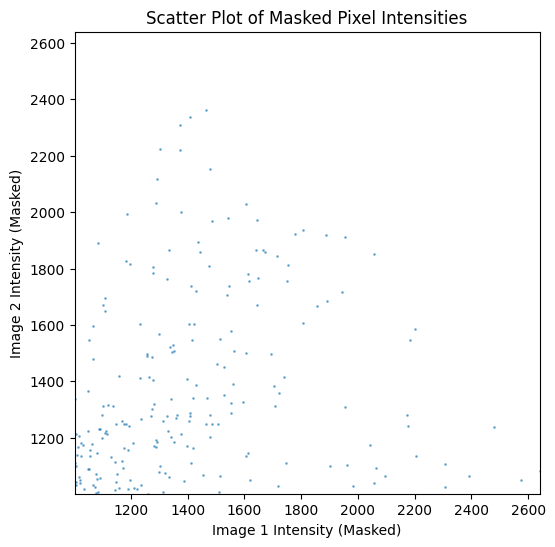

Pearson's correlation coefficient (masked): 0.1494
Pearson's correlation coefficient (masked, scipy): 0.1494, p-value: 0.0293


In [7]:
# calculate pearsons on thresholded images

# image_1_mask = ch1 > threshold_otsu(ch1)
# image_2_mask = ch2 > threshold_otsu(ch2)
image_1_mask = ch1 > 1000
image_2_mask = ch2 > 1000

# get the overlap mask
overlap_mask = image_1_mask & image_2_mask

# extract intensity from channel 1 only at pixels where both channels overlap
image_1_masked = ch1[overlap_mask]
# extract intensity from channel 2 only at pixels where both channels overlap
image_2_masked = ch2[overlap_mask]

# plot scatter plot for masked images
plt.figure(figsize=(6, 6))
plt.scatter(image_1_masked.flatten(), image_2_masked.flatten(), s=1, alpha=0.5)
plt.xlabel("Image 1 Intensity (Masked)")
plt.ylabel("Image 2 Intensity (Masked)")
plt.title("Scatter Plot of Masked Pixel Intensities")
# set both axes to the same range based on the maximum value of the masked images
max_intensity_masked = max(image_1_masked.max(), image_2_masked.max())
min_intensity_masked = min(image_1_masked.min(), image_2_masked.min())
plt.xlim(min_intensity_masked, max_intensity_masked)
plt.ylim(min_intensity_masked, max_intensity_masked)
plt.show()

mean_ch1_masked = np.mean(image_1_masked)
mean_ch2_masked = np.mean(image_2_masked)

numerator_masked = np.sum(
    (image_1_masked - mean_ch1_masked) * (image_2_masked - mean_ch2_masked)
)
denominator_masked = np.sqrt(
    np.sum((image_1_masked - mean_ch1_masked) ** 2)
    * np.sum((image_2_masked - mean_ch2_masked) ** 2)
)
prs_masked = numerator_masked / denominator_masked
print(f"Pearson's correlation coefficient (masked): {prs_masked:.4f}")

# Verify with scipy's pearsonr on the same masked data
pearson_masked_scipy, p_value_masked = pearsonr(image_1_masked, image_2_masked)
print(
    f"Pearson's correlation coefficient (masked, scipy): {pearson_masked_scipy:.4f}, p-value: {p_value_masked:.4f}"
)